In [2]:
import os
import sys

import matplotlib.pyplot as plt
import seaborn as sns
from defillama2 import DefiLlama

sys.path.append(os.path.abspath(os.path.join(os.path.dirname(os.getcwd()))))
import src.helpers as helpers

sns.set_theme()

In [3]:
save_folderpath = os.path.join("..", "images", "10_OverallAnalysis")

In [4]:
defi = DefiLlama()

# DeFi TVL and DeX Volume

In [4]:
tvl = defi.get_defi_hist_tvl()

In [5]:
volume = defi.get_dexes_volumes()

In [6]:
daily_volume = volume["daily_volume"]

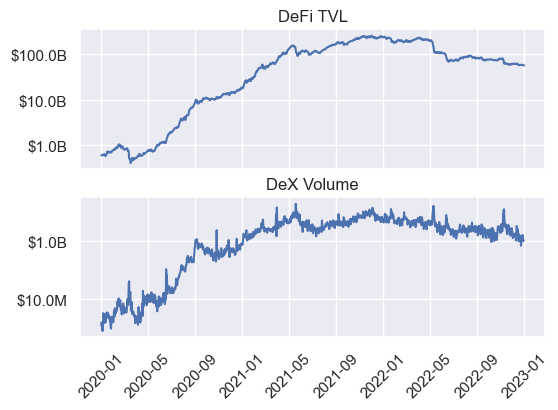

In [7]:
fig, (ax, ax1) = plt.subplots(figsize=(6, 4), nrows=2, sharex="col")

ax = sns.lineplot(x="date", y="tvl", data=tvl[tvl.index.year >= 2020], ax=ax)
ax.set_xlabel("")
ax.tick_params(axis='x', labelrotation=45)
ax.set_yscale("log")
ax.yaxis.set_major_formatter(helpers.currency_formatter)
ax.set_title("DeFi TVL")
ax.set_ylabel(None)

sns.lineplot(x="date", y="volume", data=daily_volume[daily_volume.index.year >= 2020], ax=ax1)

ax1.set_yscale("log")
ax1.yaxis.set_major_formatter(helpers.currency_formatter)
ax1.set_title("DeX Volume")

ax1.tick_params(axis='x', labelrotation=45)
ax1.set_xlabel("")
ax1.set_ylabel(None)

fig.savefig(os.path.join(save_folderpath, "defi_tvl.jpg"), dpi=300, bbox_inches="tight")

# Stablecoins

In [32]:
stablecoin_mcap = {}

stablecoin_ids = {"usdt": 1, "usdc": 2, "busd": 4, "ust": 3, "dai": 5, "frax": 6}

for coin, coin_id in stablecoin_ids.items():
    stablecoin_mcap[coin] = defi.get_stablecoin_hist_mcap(id=coin_id)

In [33]:
total_stablecoin_mcap = stablecoin_mcap["usdt"]
for coin, coin_id in stablecoin_ids.items():
    if coin_id != 1:
        total_stablecoin_mcap = total_stablecoin_mcap.add(stablecoin_mcap[coin], fill_value=0)

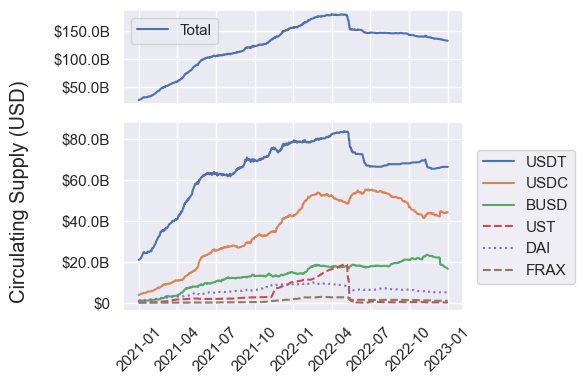

In [35]:
fig, (ax, ax1) = plt.subplots(nrows=2, sharex="col", figsize=(6, 4), gridspec_kw={"height_ratios": [1, 2]})

# Total
sns.lineplot(x="date", y="totalCirculatingUSD", data=total_stablecoin_mcap, ax=ax, label="Total")

ax.yaxis.set_major_formatter(helpers.currency_formatter)
ax.set_ylabel("")

# Individual
for coin, coin_mcap in stablecoin_mcap.items():
    if coin == "ust" or coin == "frax":
        linestyle = "dashed"
    elif coin == "dai":
        linestyle = "dotted"
    else:
        linestyle = "solid"
    sns.lineplot(x="date", y="totalCirculatingUSD", data=coin_mcap, ax=ax1, label=f"{coin.upper()}", linestyle=linestyle)

ax1.yaxis.set_major_formatter(helpers.currency_formatter)
ax1.yaxis.set_minor_formatter(helpers.currency_formatter)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.tick_params(axis='x', labelrotation=45)
ax1.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)

fig.supylabel("Circulating Supply (USD)")
fig.tight_layout()

fig.savefig(os.path.join(save_folderpath, "stablecoins.jpg"), dpi=300, bbox_inches="tight")

# TVL by chain

In [11]:
chains = ["Ethereum", "BSC", "Tron", "Arbitrum", "Polygon", "Avalanche", "Optimism", "Fantom", "Solana", "Osmosis", "Bitcoin", "Algorand"]

historical_tvl_chains = {}
for chain in chains:
    historical_tvl_chains[chain] = defi.get_chain_hist_tvl(chain=chain)

In [12]:
total = historical_tvl_chains["Ethereum"]
for chain in chains[1:]:
    total = total.add(historical_tvl_chains[chain], fill_value=0)

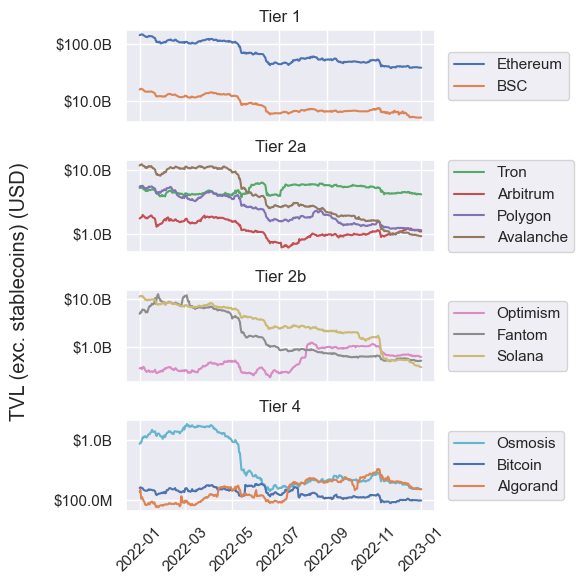

In [13]:
fig, (ax, ax1, ax2, ax3) = plt.subplots(figsize=(6, 6), nrows=4, sharex="col")

for idx, (chain, chain_tvl) in enumerate(historical_tvl_chains.items()):
    chain_tvl = chain_tvl[(chain_tvl.index.year >= 2022)]
    if idx < 2:
        sns.lineplot(x="date", y="tvl", data=chain_tvl, label=f"{chain}", ax=ax, color=f"C{idx}")
    elif 2 <= idx < 6:
        sns.lineplot(x="date", y="tvl", data=chain_tvl, label=f"{chain}", ax=ax1, color=f"C{idx}")
    elif 6 <= idx < 9:
        sns.lineplot(x="date", y="tvl", data=chain_tvl, label=f"{chain}", ax=ax2, color=f"C{idx}")
    else:
        sns.lineplot(x="date", y="tvl", data=chain_tvl, label=f"{chain}", ax=ax3, color=f"C{idx}")

ax.set_title("Tier 1")
ax.set_yscale("log")
ax.yaxis.set_major_formatter(helpers.currency_formatter)
ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
ax.set_ylabel(None)

ax1.set_title("Tier 2a")
ax1.set_yscale("log")
ax1.yaxis.set_major_formatter(helpers.currency_formatter)
ax1.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
ax1.set_ylabel(None)

ax2.set_title("Tier 2b")
ax2.set_yscale("log")
ax2.yaxis.set_major_formatter(helpers.currency_formatter)
ax2.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
ax2.set_ylabel(None)

ax3.set_title("Tier 4")
ax3.set_yscale("log")
ax3.yaxis.set_major_formatter(helpers.currency_formatter)
ax3.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
ax3.set_ylabel(None)

ax3.tick_params(axis='x', labelrotation=45)
ax3.set_xlabel(None)

fig.supylabel("TVL (exc. stablecoins) (USD)")
fig.tight_layout()

fig.savefig(os.path.join(save_folderpath, "chain_tvl.jpg"), dpi=300, bbox_inches="tight")

In [14]:
daily_fees = defi.get_fees(data_type="dailyFees")

In [15]:
daily_fees_by_protocol = daily_fees["daily_fees_by_dex"]

In [16]:
daily_fees_by_protocol.columns

Index(['bitcoin', 'compound', 'doge', 'ethereum', 'litecoin', 'opensea',
       'uniswap', 'makerdao', 'canto', 'cronos', 'xdai', 'curve', 'tron',
       'ghostmarket', 'balancer', 'celo', 'polygon', 'aurora', 'fantom', 'bsc',
       'honeyswap', 'sushiswap', 'quickswap', 'lido', 'mooniswap', 'solana',
       'pangolin', 'apeswap', 'elk', 'kyberswap', 'liquity', 'spookyswap',
       'pancakeswap', 'spiritswap', 'convex', 'mimo', 'shibaswap', 'traderjoe',
       'moonriver', 'abracadabra', 'gmx', 'solarbeam', 'defi-swap', 'biswap',
       'geist-finance', 'mojitoswap', 'nomiswap', 'woofi', 'angle',
       'synthetix', 'optimism', 'frax-swap', 'looksrare', 'moonbeam',
       'stellaswap', 'radioshack', 'moonwell-apollo', 'junoswap', 'aave',
       'valas-finance', '0vix', 'wombat-exchange', 'emdx', 'velodrome',
       'metavault.trade', 'moonwell-artemis', 'lyra', 'premia', 'mux',
       'mm-stableswap-polygon', 'arbitrum', 'gains-network', 'babydogeswap',
       'stargate', 'osmosis', '

### VERIFY

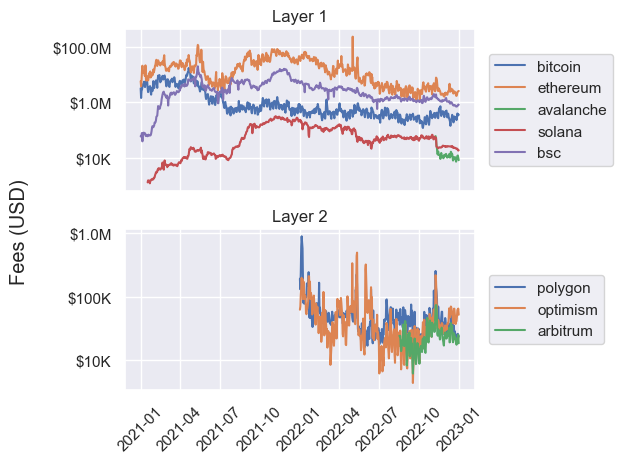

In [17]:
layer_1 = ["bitcoin", "ethereum", "avalanche", "solana", "bsc"]
layer_2 = ["polygon", "optimism", "arbitrum"]

fig, (ax, ax1) = plt.subplots(nrows=2, sharex="col")

for protocol in layer_1:
    sns.lineplot(x="date", y=protocol, data=daily_fees_by_protocol[daily_fees_by_protocol.index.year >= 2021], label=protocol, ax=ax)

ax.set_yscale("log")
ax.yaxis.set_major_formatter(helpers.currency_formatter)
ax.tick_params(axis='x', labelrotation=45)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title("Layer 1")
ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)

for protocol in layer_2:
    sns.lineplot(x="date", y=protocol, data=daily_fees_by_protocol[daily_fees_by_protocol.index.year >= 2022], label=protocol, ax=ax1)

ax1.set_yscale("log")
ax1.yaxis.set_major_formatter(helpers.currency_formatter)
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_title("Layer 2")
ax1.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)

fig.supylabel("Fees (USD)")
fig.tight_layout()

fig.savefig(os.path.join(save_folderpath, "l1_and_l2_fees.jpg"), dpi=300, bbox_inches="tight")

In [18]:
daily_fees_by_protocol = daily_fees_by_protocol[daily_fees_by_protocol.index.year >= 2022]

In [19]:
daily_volume_by_protocol = volume["daily_volume_by_dex"]
daily_volume_by_protocol = daily_volume_by_protocol[daily_volume_by_protocol.index.year >= 2022]

In [20]:
daily_volume_by_protocol.columns

Index(['uniswap', 'dodo', 'sunswap', 'honeyswap', 'sushiswap', 'pancakeswap',
       'dfyn', 'quickswap', 'luaswap', 'hyperjump',
       ...
       'myswap', 'liquidswap', 'koyo', 'smbswap', 'mummy-finance',
       'el-dorado-exchange', 'level-finance', 'wx.network', 'aux-exchange',
       'kokonut-swap'],
      dtype='object', length=215)

### CROSS REFERENCE

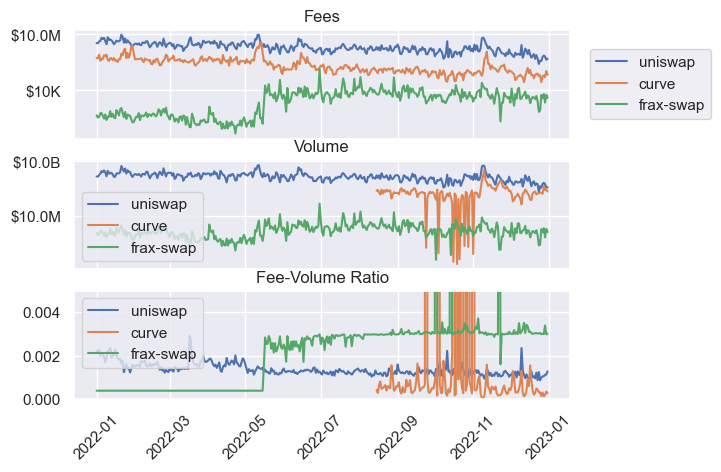

In [21]:
applications = ["uniswap", "curve", "frax-swap"]

fig, (ax, ax1, ax2) = plt.subplots(nrows=3, sharex="col")

for protocol in applications:
    sns.lineplot(x=daily_fees_by_protocol.index, y= daily_fees_by_protocol[protocol], label=protocol, ax=ax)

ax.set_yscale("log")
ax.yaxis.set_major_formatter(helpers.currency_formatter)
ax.tick_params(axis='x', labelrotation=45)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title("Fees")
ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)

for protocol in applications:
    sns.lineplot(x=daily_volume_by_protocol.index, y=daily_volume_by_protocol[protocol], label=protocol, ax=ax1)

ax1.set_yscale("log")
ax1.yaxis.set_major_formatter(helpers.currency_formatter)
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_title("Volume")

for protocol in applications:
    sns.lineplot(x=daily_fees_by_protocol.index, y=daily_fees_by_protocol[protocol].divide(daily_volume_by_protocol[protocol]), label=protocol, ax=ax2)

ax2.tick_params(axis='x', labelrotation=45)
ax2.set_xlabel(None)
ax2.set_ylabel(None)
ax2.set_title("Fee-Volume Ratio")
ax2.set_ylim(0, 0.005)

fig.savefig(os.path.join(save_folderpath, "fee_volume_ratio.jpg"), dpi=300, bbox_inches="tight")